In [1]:
from lib import *
from lable import *

In [2]:
path_train = r"D:\Machine_learning_basic\Penguins vs Turtles\train\train"
path_valid = r'D:\Machine_learning_basic\Penguins vs Turtles\valid\valid'

data_train, label_train = data(path_train)
data_valid, label_valid = data(path_valid)

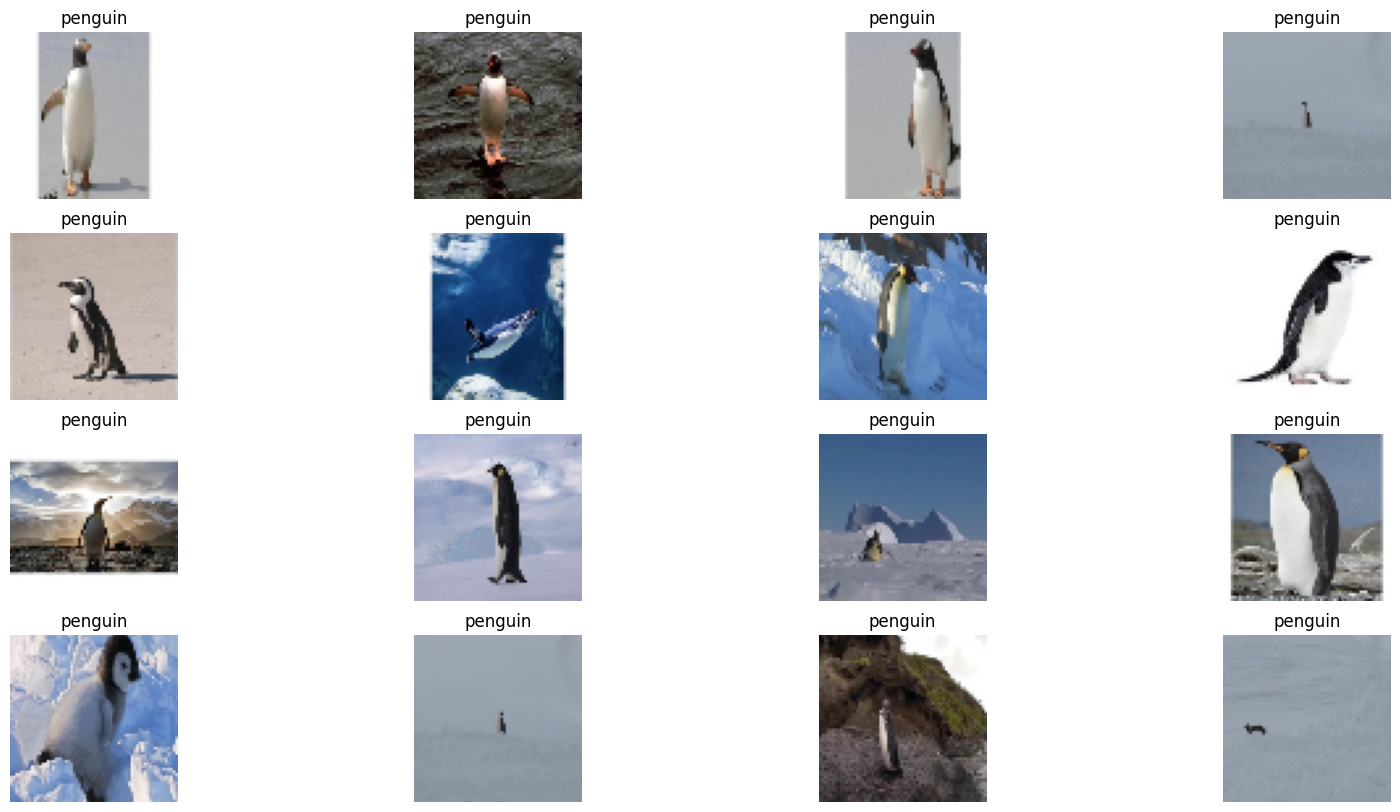

In [3]:
visualiztion(data_train)

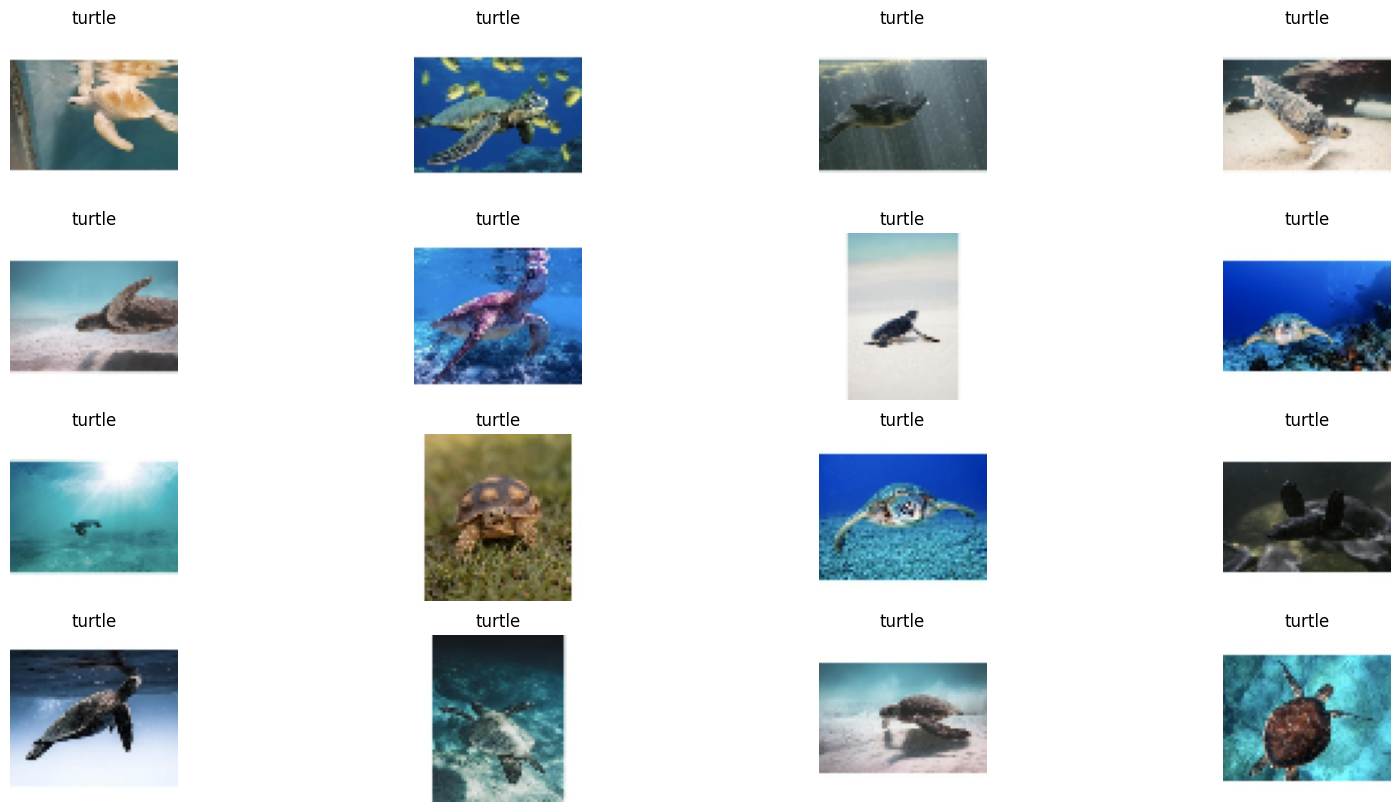

In [4]:
visualiztion(data_valid)

In [5]:
data_train_hog = hog_data(data_train)
data_valid_hog = hog_data(data_valid)

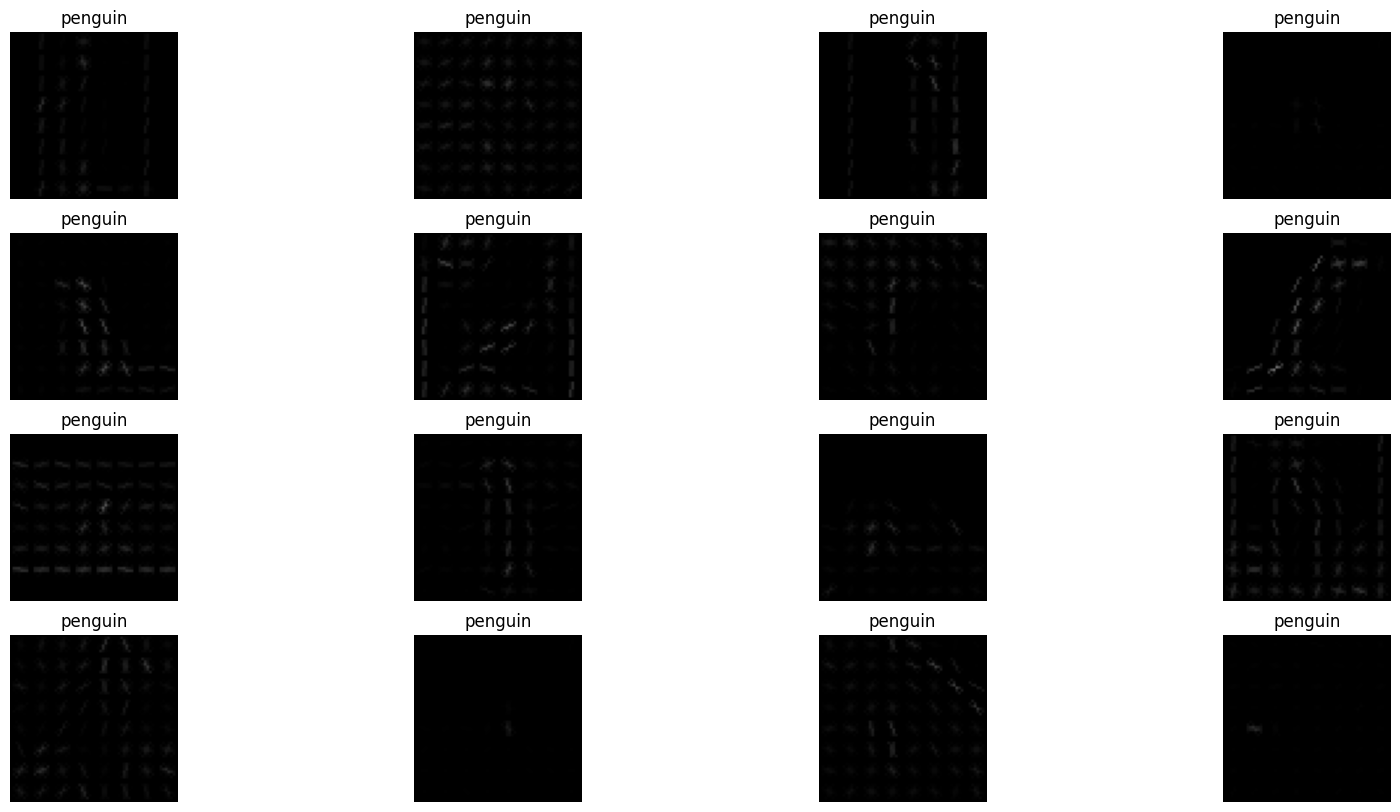

In [6]:
visualiztion(data_train_hog)

In [7]:
data_train_model = data_label(data_train_hog, label_train)
data_valid_model = data_label(data_valid_hog, label_valid)

In [8]:
X_train, y_train = train_test_split_(data_train_model)
X_test, y_test = train_test_split_(data_valid_model)

In [9]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'class_weight': [None, 'balanced']
}

In [10]:
SVC_model = SVC()
grid_search = GridSearchCV(estimator=SVC_model, param_grid= param_grid, cv=5)

In [11]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': [None, 'balanced'],
                         'kernel': ['linear', 'rbf']})

In [12]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 10, 'class_weight': None, 'kernel': 'rbf'}


In [13]:
best_model = grid_search.best_estimator_

In [14]:
y_predict = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

In [15]:
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 69.44%


In [16]:
knn = KNeighborsClassifier()

In [17]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7],      # Số lượng hàng xóm gần nhất
    'weights': ['uniform', 'distance'],  # Cách tính trọng số
    'metric': ['euclidean', 'manhattan']  # Phương pháp tính khoảng cách
}

In [18]:
grid_search = GridSearchCV(knn, param_grid_knn, cv=5)

In [19]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [20]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [21]:
best_model_knn = grid_search.best_estimator_

In [22]:
y_predict_knn = best_model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_predict_knn)

In [23]:
print("KNN model accuracy: {:.2f}%".format(accuracy_knn * 100))

KNN model accuracy: 65.28%
